##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
#     -O /tmp/horse-or-human.zip

# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
#     -O /tmp/validation-horse-or-human.zip
  
import os
import zipfile

# local_zip = '/tmp/horse-or-human.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp/horse-or-human')
# local_zip = '/tmp/validation-horse-or-human.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp/validation-horse-or-human')
# zip_ref.close()
# Directory with our training horse pictures
train_horse_dir = os.path.join('D:\Jupyter-demo\ComputerVision_with_tensorflow\horse-or-human\horses')

# Directory with our training human pictures
train_human_dir = os.path.join('D:\Jupyter-demo\ComputerVision_with_tensorflow\horse-or-human\humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('D:\Jupyter-demo\ComputerVision_with_tensorflow\validation-horse-or-human\horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('D:\Jupyter-demo\ComputerVision_with_tensorflow\validation-horse-or-human\humans')

## Building a Small Model from Scratch

But before we continue, let's start defining the model:

Step 1 will be to import tensorflow.

In [2]:
import tensorflow as tf

We then add convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers.

Finally we add the densely connected layers. 

Note that because we are facing a two-class classification problem, i.e. a *binary classification problem*, we will end our network with a [*sigmoid* activation](https://wikipedia.org/wiki/Sigmoid_function), so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [3]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [4]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'D:\\Jupyter-demo\\ComputerVision_with_tensorflow\\horse-or-human\\',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'D:\\Jupyter-demo\\ComputerVision_with_tensorflow\\validation-horse-or-human\\',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [7]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/100
8/8 [==============================] - 66s 8s/step - loss: 0.6816 - accuracy: 0.5606 - val_loss: 0.6502 - val_accuracy: 0.5234
Epoch 2/100
8/8 [==============================] - 64s 8s/step - loss: 0.6662 - accuracy: 0.6185 - val_loss: 0.5835 - val_accuracy: 0.7812
Epoch 3/100
8/8 [==============================] - 63s 8s/step - loss: 0.6541 - accuracy: 0.6474 - val_loss: 0.5754 - val_accuracy: 0.6797
Epoch 4/100
8/8 [==============================] - 63s 8s/step - loss: 0.6283 - accuracy: 0.6830 - val_loss: 0.6714 - val_accuracy: 0.5430
Epoch 5/100
8/8 [==============================] - 75s 9s/step - loss: 0.6047 - accuracy: 0.6982 - val_loss: 0.5265 - val_accuracy: 0.6992
Epoch 6/100
8/8 [==============================] - 73s 9s/step - loss: 0.6047 - accuracy: 0.6785 - val_loss: 0.3944 - val_accuracy: 0.8789
Epoch 7/100
8/8 [==============================] - 74s 9s/step - loss: 0.5703 - accuracy: 0.6963 - val_loss: 0.4469 - val_accuracy: 0.7773
Epoch 8/100
8/8 [==========

8/8 [==============================] - 57s 7s/step - loss: 0.2035 - accuracy: 0.9232 - val_loss: 1.5626 - val_accuracy: 0.6445
Epoch 60/100
8/8 [==============================] - 55s 7s/step - loss: 0.2067 - accuracy: 0.9277 - val_loss: 1.4136 - val_accuracy: 0.6797
Epoch 61/100
8/8 [==============================] - 56s 7s/step - loss: 0.3868 - accuracy: 0.8632 - val_loss: 1.2413 - val_accuracy: 0.6953
Epoch 62/100
8/8 [==============================] - 55s 7s/step - loss: 0.1917 - accuracy: 0.9288 - val_loss: 1.5327 - val_accuracy: 0.6602
Epoch 63/100
8/8 [==============================] - 57s 7s/step - loss: 0.2049 - accuracy: 0.9210 - val_loss: 1.7581 - val_accuracy: 0.6484
Epoch 64/100
8/8 [==============================] - 50s 6s/step - loss: 0.2268 - accuracy: 0.9032 - val_loss: 1.0044 - val_accuracy: 0.7148
Epoch 65/100
8/8 [==============================] - 50s 6s/step - loss: 0.2196 - accuracy: 0.9143 - val_loss: 2.3247 - val_accuracy: 0.6055
Epoch 66/100
8/8 [===============

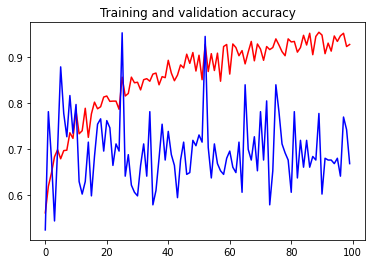

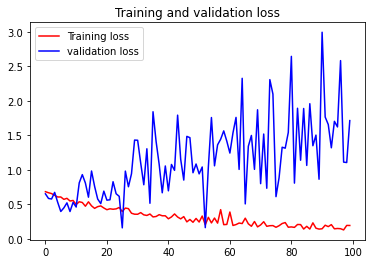

In [8]:
# import matplotlib.pyplot as plt
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')

# plt.figure()

# plt.plot(epochs, loss, 'r', label='Training Loss')
# plt.plot(epochs, val_loss, 'b', label='Validation Loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()